In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
train = pd.read_csv('train_yaOffsB.csv')
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [55]:
train.shape

(88858, 10)

In [164]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [8]:
train['Crop_Type'].value_counts()

0    63589
1    25269
Name: Crop_Type, dtype: int64

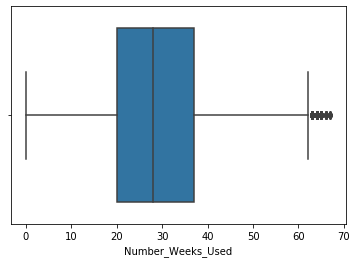

In [12]:
sns.boxplot(train['Number_Weeks_Used'])

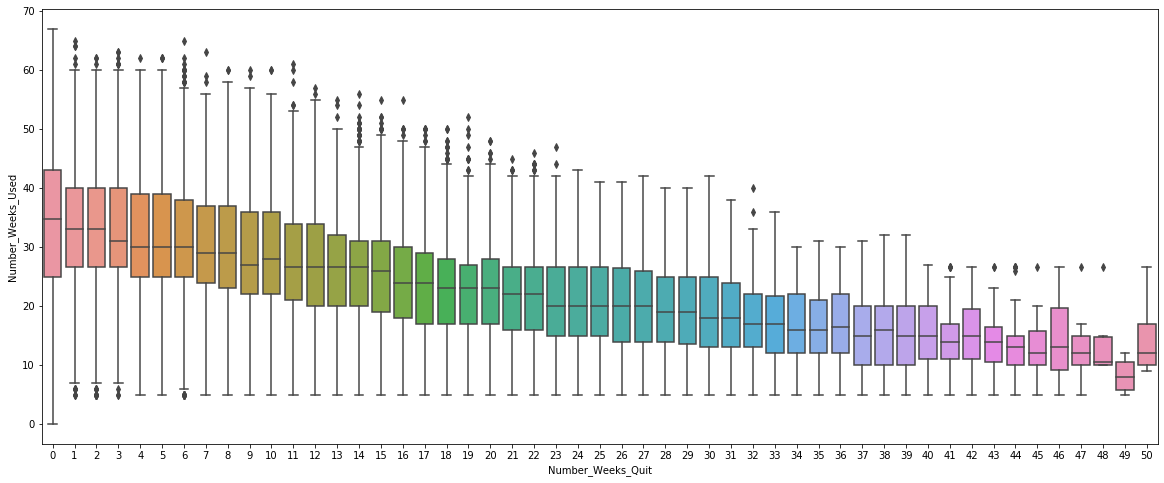

In [143]:
plt.figure(figsize=(20,8))
sns.boxplot(train['Number_Weeks_Quit'],train['Number_Weeks_Used'])

In [137]:
train.corr()['Number_Weeks_Used']

Estimated_Insects_Count    0.406347
Crop_Type                 -0.035528
Soil_Type                 -0.064208
Pesticide_Use_Category     0.360725
Number_Doses_Week          0.121948
Number_Weeks_Used          1.000000
Number_Weeks_Quit         -0.438305
Season                     0.004882
Crop_Damage                0.219600
Name: Number_Weeks_Used, dtype: float64

In [162]:
df = train.groupby('Number_Weeks_Quit')['Number_Weeks_Used'].median().to_frame().reset_index()
df

,Number_Weeks_Quit,Number_Weeks_Used
0,0,35.0
1,1,35.0
2,2,34.0
3,3,33.0
4,4,32.0
5,5,32.0
6,6,31.0
7,7,30.0
8,8,30.0
9,9,29.0


In [111]:
train.groupby(['Season','Pesticide_Use_Category'])['Number_Weeks_Used'].mean().to_frame()

Number_Weeks_Used
Season Pesticide_Use_Category                   
1      1                                0.000000
       2                               26.585103
       3                               34.558597
2      1                                0.000000
       2                               26.645443
       3                               35.024750
3      1                                0.000000
       2                               26.592357
       3                               34.807604

'F00000001'

In [109]:
def impute_train(col):
    season=col[0]
    pesticide_use_category = col[1]
    Number_Weeks_Used=col[2]
    
    if pd.isnull(Number_Weeks_Used):
        if season==1:
            if pesticide_use_category==1:
                return 0
            elif pesticide_use_category==2:
                return 26.585103
            elif pesticide_use_category==3:
                return 34.558597
        elif season==2:
            if pesticide_use_category==1:
                return 0
            elif pesticide_use_category==2:
                return 26.645443
            elif pesticide_use_category==3:
                return 35.024750
        elif season==3:
            if pesticide_use_category==1:
                return 0
            elif pesticide_use_category==2:
                return 26.592357
            elif pesticide_use_category==3:
                return 34.807604
    else:
        return Number_Weeks_Used

In [176]:
train['Number_Weeks_Used'] = train[['Number_Weeks_Quit','Number_Weeks_Used']].apply(impute,axis=1)
train.isnull().sum()

IndexError: invalid index to scalar variable.

In [167]:
train['Number_Weeks_Used']

TypeError: item() takes 1 positional argument but 2 were given

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [113]:
xtrain = train.drop(['ID','Crop_Damage'],axis=1)
ytrain = train['Crop_Damage']

In [127]:
rf = RandomForestClassifier(n_estimators=150,random_state=1,max_depth=15,max_features=8,criterion='entropy')
cross_val_score(rf,xtrain,ytrain,cv=10,n_jobs=-1)

array([0.84166104, 0.84289894, 0.8415485 , 0.84267387, 0.83963538,
       0.84098582, 0.83862255, 0.84076075, 0.84074282, 0.84265616])

In [140]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFClassifier

In [75]:
param = {'max_depth':range(2,10),'max_features':range(2,10),'min_samples_split':range(2,5),}
gs = GridSearchCV(rf,param_grid=param,n_jobs=-1,cv=10)
gs.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                          

In [76]:
gs.best_params_

{'max_depth': 9, 'max_features': 4}

In [95]:
rf = RandomForestClassifier(random_state=1,max_depth=9,max_features=4,min_impurity_split=5,min_samples_split=3)
cross_val_score(rf,xtrain,ytrain,cv=10,n_jobs=-1)

array([0.83547153, 0.83547153, 0.83547153, 0.83547153, 0.83547153,
       0.83547153, 0.83547153, 0.83547153, 0.83545301, 0.83545301])

In [141]:
xg = XGBRFClassifier()
cross_val_score(xg,xtrain,ytrain,cv=10,n_jobs=-1)

array([0.84098582, 0.8403106 , 0.84098582, 0.84098582, 0.83986045,
       0.83986045, 0.8415485 , 0.83941031, 0.84074282, 0.83882949])

In [117]:
test = pd.read_csv('test_pFkWwen.csv')
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [118]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [120]:
test.groupby(['Season','Pesticide_Use_Category'])['Number_Weeks_Used'].mean().to_frame()

Number_Weeks_Used
Season Pesticide_Use_Category                   
1      1                                0.000000
       2                               26.787987
       3                               35.057149
2      1                                0.000000
       2                               26.675198
       3                               34.809979
3      1                                0.000000
       2                               26.689035
       3                               35.018676

In [121]:
def impute_test(col):
    season=col[0]
    pesticide_use_category = col[1]
    Number_Weeks_Used=col[2]
    
    if pd.isnull(Number_Weeks_Used):
        if season==1:
            if pesticide_use_category==1:
                return 0
            elif pesticide_use_category==2:
                return 26.787987
            elif pesticide_use_category==3:
                return 35.057149
        elif season==2:
            if pesticide_use_category==1:
                return 0
            elif pesticide_use_category==2:
                return 26.675198
            elif pesticide_use_category==3:
                return 34.809979
        elif season==3:
            if pesticide_use_category==1:
                return 0
            elif pesticide_use_category==2:
                return 26.689035
            elif pesticide_use_category==3:
                return 35.018676
    else:
        return Number_Weeks_Used

In [122]:
test['Number_Weeks_Used'] = test[['Season','Pesticide_Use_Category','Number_Weeks_Used']].apply(impute_test,axis=1)
test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [129]:
x = test.drop(['ID'],axis=1)

In [128]:
rf = RandomForestClassifier(n_estimators=150,random_state=1,max_depth=15,max_features=8,criterion='entropy')
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [130]:
y_rf = rf.predict(x)

In [131]:
final = pd.concat([test['ID'],pd.DataFrame(y_rf,columns=['Crop_Damage'])],axis=1)
final.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,2
4,F00000014,1


In [132]:
final.to_csv('final.csv',index=False)